In [36]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def initial_circuit(lam):
    qc = QuantumCircuit(1,1)
    qc.ry(2*lam, 0)
    return qc
        

In [65]:
def expect_val(A, lam, shots):
    backend = Aer.get_backend('qasm_simulator')
    qcz = initial_circuit(lam)
    qcx = initial_circuit(lam)
    
    #Circuit Z
    qcz.measure(0, 0)
    
    #Circuit X
    qcx.h(0)
    qcx.measure(0, 0)
    
    
    job_z = execute(qcz, backend, shots=shots)
    result_z = job_z.result()
    count_z = result_z.get_counts(qcz)
    
    if '0' not in count_z:
        count_z['0'] = 0 
    if '1' not in count_z:
        count_z['1'] = 0
    exp_z = count_z['0']/shots - count_z['1']/shots
    
    job_x = execute(qcx, backend, shots=shots)
    result_x = job_x.result()
    count_x = result_x.get_counts(qcx)
    
    if '0' not in count_x:
        count_x['0'] = 0 
    if '1' not in count_x:
        count_x['1'] = 0
    exp_x = count_x['0']/shots - count_x['1']/shots
    
    
    return (A[0][0] + A[1][1])/2 + A[0][1]*exp_x + ((A[0][0] - A[1][1])/2)*exp_z
    

In [84]:
A = np.array([[2,3], [1,1]])
lams = np.linspace(0, 2*np.pi, 3000)
shots = 2048

In [85]:
vals = []
for lam in lams:
    vals.append(expect_val(A, lam, shots=shots))
    
vals = np.array(vals)

In [93]:
np.min(np.linalg.eig(A)[0])

-0.3027756377319948

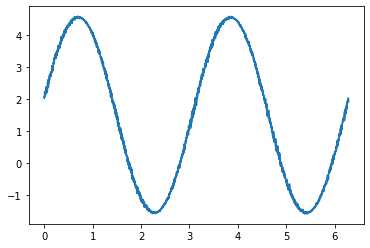

In [87]:
plt.plot(lams, vals)

In [92]:
np.min(vals)

-1.57666015625